# 0. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/train.csv')
titanic_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 1. 결측치 개수 확인 & 처리

In [ ]:
print('데이터 세트 Null 값의 개수 \n', titanic_df.isnull().sum())

데이터 세트 Null 값의 개수 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값의 개수 ', titanic_df.isnull().sum().sum())

In [ ]:
titanic_df.dropna(axis=0, inplace=True)

In [ ]:
print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64


 Cabin 값 분포 :
 C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
B102           1
D11            1
B78            1
A20            1
E12            1
Name: Cabin, Length: 147, dtype: int64


 Embarked 값 분포 :
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


# 2. 데이터 확인하기
### 2.1 선실 등급에 따라 부자와 가난한 사람에 대한 판별을 하기 위해 선실 등급(Cabin 맨 앞자리)만 추출한다. 

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

### 2.2 성별에 따른 생존여부 분석

In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여성 생존자수가 남성 생존자수보다 현저히 많은 것을 알 수 있다.

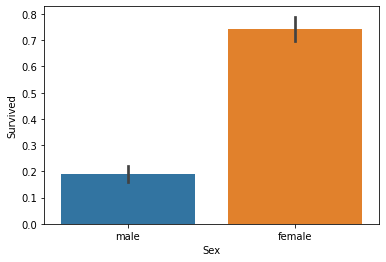

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

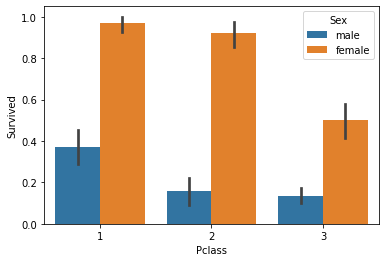

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

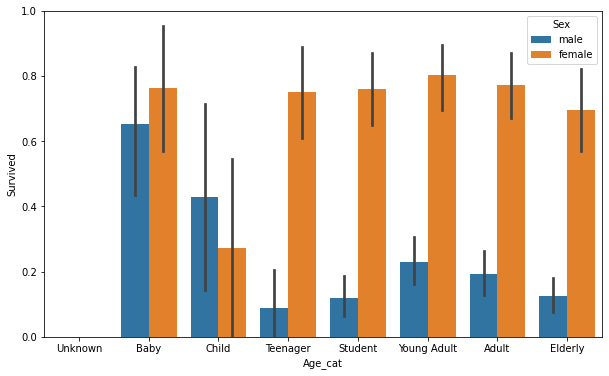

In [ ]:
def get_category(age):
  cat = ''
  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'

  return cat

plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
# titanic_df.drop('Age_cat', axis=1, inplace=True)

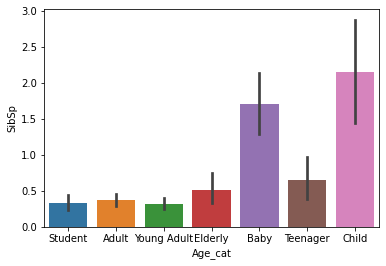

In [ ]:
sns.barplot(x='Age_cat', y='SibSp', data=titanic_df)

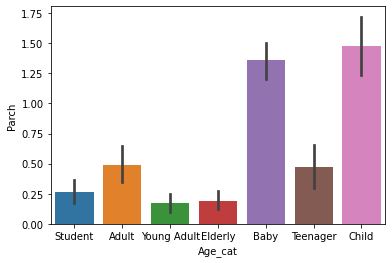

In [ ]:
sns.barplot(x='Age_cat', y='Parch', data=titanic_df)

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(30)

TypeError: ignored

In [ ]:
titanic_df.groupby(titanic_df['Pclass'] == 1)['Fare'].mean()[1]

84.15468749999992

In [ ]:
fill_mean_func = lambda g: g['Age'].fillna(g.mean(), inplace=True)
titanic_df.groupby('Parch').apply(fill_mean_func)

""


In [ ]:
titanic_df.groupby('Age_cat').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,,,
Adult,461.210256,0.400000,1.835897,44.830769,0.369231,0.487179,44.259658
Baby,410.954545,0.704545,2.568182,2.503864,1.704545,1.363636,31.528030
Child,470.240000,0.360000,2.760000,8.760000,2.160000,1.480000,31.551000
Elderly,435.246231,0.286432,2.487437,66.022727,0.517588,0.190955,24.282578
Student,434.024691,0.333333,2.456790,22.108025,0.333333,0.265432,29.119675
Teenager,458.371429,0.428571,2.485714,16.578571,0.657143,0.471429,33.451313
Young Adult,452.040816,0.423469,2.295918,30.303571,0.316327,0.173469,30.592323


In [ ]:
print('데이터 세트 Null 값의 개수 \n', titanic_df.isnull().sum())

데이터 세트 Null 값의 개수 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            796
SibSp          796
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_cat          0
dtype: int64


In [ ]:
titanic_df['Age'] = titanic_df[titanic_df['Parch'] >= 2]['Age'].fillna(10)

In [ ]:
print('데이터 세트 Null 값의 개수 \n', titanic_df[titanic_df['Age'].isnull()]['Parch'].isnull().sum())

데이터 세트 Null 값의 개수 
 0


### 2.3 지금까지 전처리한 코드를 transform_features() 라는 하나의 함수에서 실행할 수 있도록 만들었습니다.

In [ ]:
def fillna(df):
  
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  return df

# 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

# 3. 머신러닝 모델 학습해보기

In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
print(X_titanic_df.head())
print('전체 데이터의 개수 :',X_titanic_df.size)

   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked
0       3    1  22.0      1      0   7.2500      7         3
1       1    0  38.0      1      0  71.2833      2         0
2       3    0  26.0      0      0   7.9250      7         3
3       1    0  35.0      1      0  53.1000      2         3
4       3    1  35.0      0      0   8.0500      7         3
전체 데이터의 개수 : 7128


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [ ]:
print('train_test_split 한 후의 train data 개수 :',X_train.size)
print('train_test_split 한 후의 test data 개수 :',X_test.size)

train_test_split 한 후의 train data 개수 : 5696
train_test_split 한 후의 test data 개수 : 1432


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 3.1 세 가지 모델 학습 / 예측 / 평가

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0: .4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습 / 예측 / 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0: .4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:  0.7877
RandomForestClassifier 정확도:  0.8547
LogisticRegression 정확도:  0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 3.2 KFold 교차 검증

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores = []

  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))
  
  mean_score = np.mean(scores)
  print('평균 정확도:{0: .4f}'.format(mean_score))

print('DecisionTreeClassifier\n')
print(exec_kfold(dt_clf, folds=5))

print('\nRandomForestClassifier\n')
print(exec_kfold(rf_clf, folds=5))

print('\nLogisticRegression\n')
print(exec_kfold(lr_clf, folds=5))

DecisionTreeClassifier

교차 검증 0 정확도:  0.7542
교차 검증 1 정확도:  0.7809
교차 검증 2 정확도:  0.7865
교차 검증 3 정확도:  0.7697
교차 검증 4 정확도:  0.8202
평균 정확도: 0.7823
None

RandomForestClassifier

교차 검증 0 정확도:  0.7933
교차 검증 1 정확도:  0.8090
교차 검증 2 정확도:  0.8371
교차 검증 3 정확도:  0.7753
교차 검증 4 정확도:  0.8596
평균 정확도: 0.8148
None

LogisticRegression

교차 검증 0 정확도:  0.8045
교차 검증 1 정확도:  0.7809
교차 검증 2 정확도:  0.7753
교차 검증 3 정확도:  0.7472
교차 검증 4 정확도:  0.8090
평균 정확도: 0.7834
None


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 3.3 cross validation 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score

print('DecisionTreeClassifier')
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))


print('\nRandomForestClassifier')
scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

print('\nLogisticRegression')
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1: .4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

DecisionTreeClassifier
교차 검증 0 정확도:  0.7430
교차 검증 1 정확도:  0.7753
교차 검증 2 정확도:  0.7921
교차 검증 3 정확도:  0.7865
교차 검증 4 정확도:  0.8427
평균 정확도: 0.7879

RandomForestClassifier
교차 검증 0 정확도:  0.7933
교차 검증 1 정확도:  0.7978
교차 검증 2 정확도:  0.8483
교차 검증 3 정확도:  0.7640
교차 검증 4 정확도:  0.8652
평균 정확도: 0.8137

LogisticRegression
교차 검증 0 정확도:  0.7989
교차 검증 1 정확도:  0.7697
교차 검증 2 정확도:  0.7809
교차 검증 3 정확도:  0.7753
교차 검증 4 정확도:  0.7978
평균 정확도: 0.7845


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 3.4 GridSearchCV



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0: .4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0: .4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 :  0.8715


In [ ]:
grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0: .4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 RandomForestClassifier 정확도 : {0: .4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.8146
테스트 세트에서의 RandomForestClassifier 정확도 :  0.8827


# 4. test 데이터 넣어서 test 하기

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
transform_features(test_df)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,34.5,0,0,7.8292,7,1
1,3,0,47.0,1,0,7.0000,7,2
2,2,1,62.0,0,0,9.6875,7,1
3,3,1,27.0,0,0,8.6625,7,2
4,3,0,22.0,1,1,12.2875,7,2


In [ ]:
grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_titanic_df, y_titanic_df)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0: .4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(test_df)

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.8283


In [ ]:
dpredictions.size

418

In [ ]:
df = pd.DataFrame(dpredictions)
df.rename(columns={0:'Survived'}, inplace=True)
df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
test_new_df = pd.read_csv('/content/drive/MyDrive/Kaggle_Study/titanic/test.csv')
test_new_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
result = pd.concat([test_new_df['PassengerId'], df], axis=1)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('answer_rf.csv', index=False)